## Imports & Config

In [1]:
import torch
import yaml
from arcade_dataset import load_dataset, visualize_batch
import matplotlib.pyplot as plt
from model import VesselSegmentationModel
import pytorch_lightning as pl
torch.cuda.empty_cache()

In [2]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [3]:
config = yaml.load(open('model_overfit_config.yaml', 'r'), Loader=yaml.FullLoader)

In [4]:
modalities, H_in, W_in = config['input']['image_shape']

## Model Definition

In [21]:
# model = VesselSegmentationModel.load_from_checkpoint('/home/paperspace/DMI2024B/models/first_run/epoch=155-step=19500.ckpt')
model = VesselSegmentationModel.load_from_checkpoint('/home/paperspace/DMI2024B/models/third_run/epoch=77-step=9750.ckpt')

In [22]:
trainer = pl.Trainer(accelerator='auto')
trainer.test(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1           0.012198535725474358
        test_iou           0.006148089189082384
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_f1': 0.012198535725474358, 'test_iou': 0.006148089189082384}]

In [20]:
# trainer = pl.Trainer()
# model.test_step(model.test_dataloader(), 0)

## Overfit the model on a single batch

In [12]:
dataset = load_dataset(split='test')
next(iter(dataset)).keys()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)

In [13]:
batch = next(iter(dataloader))

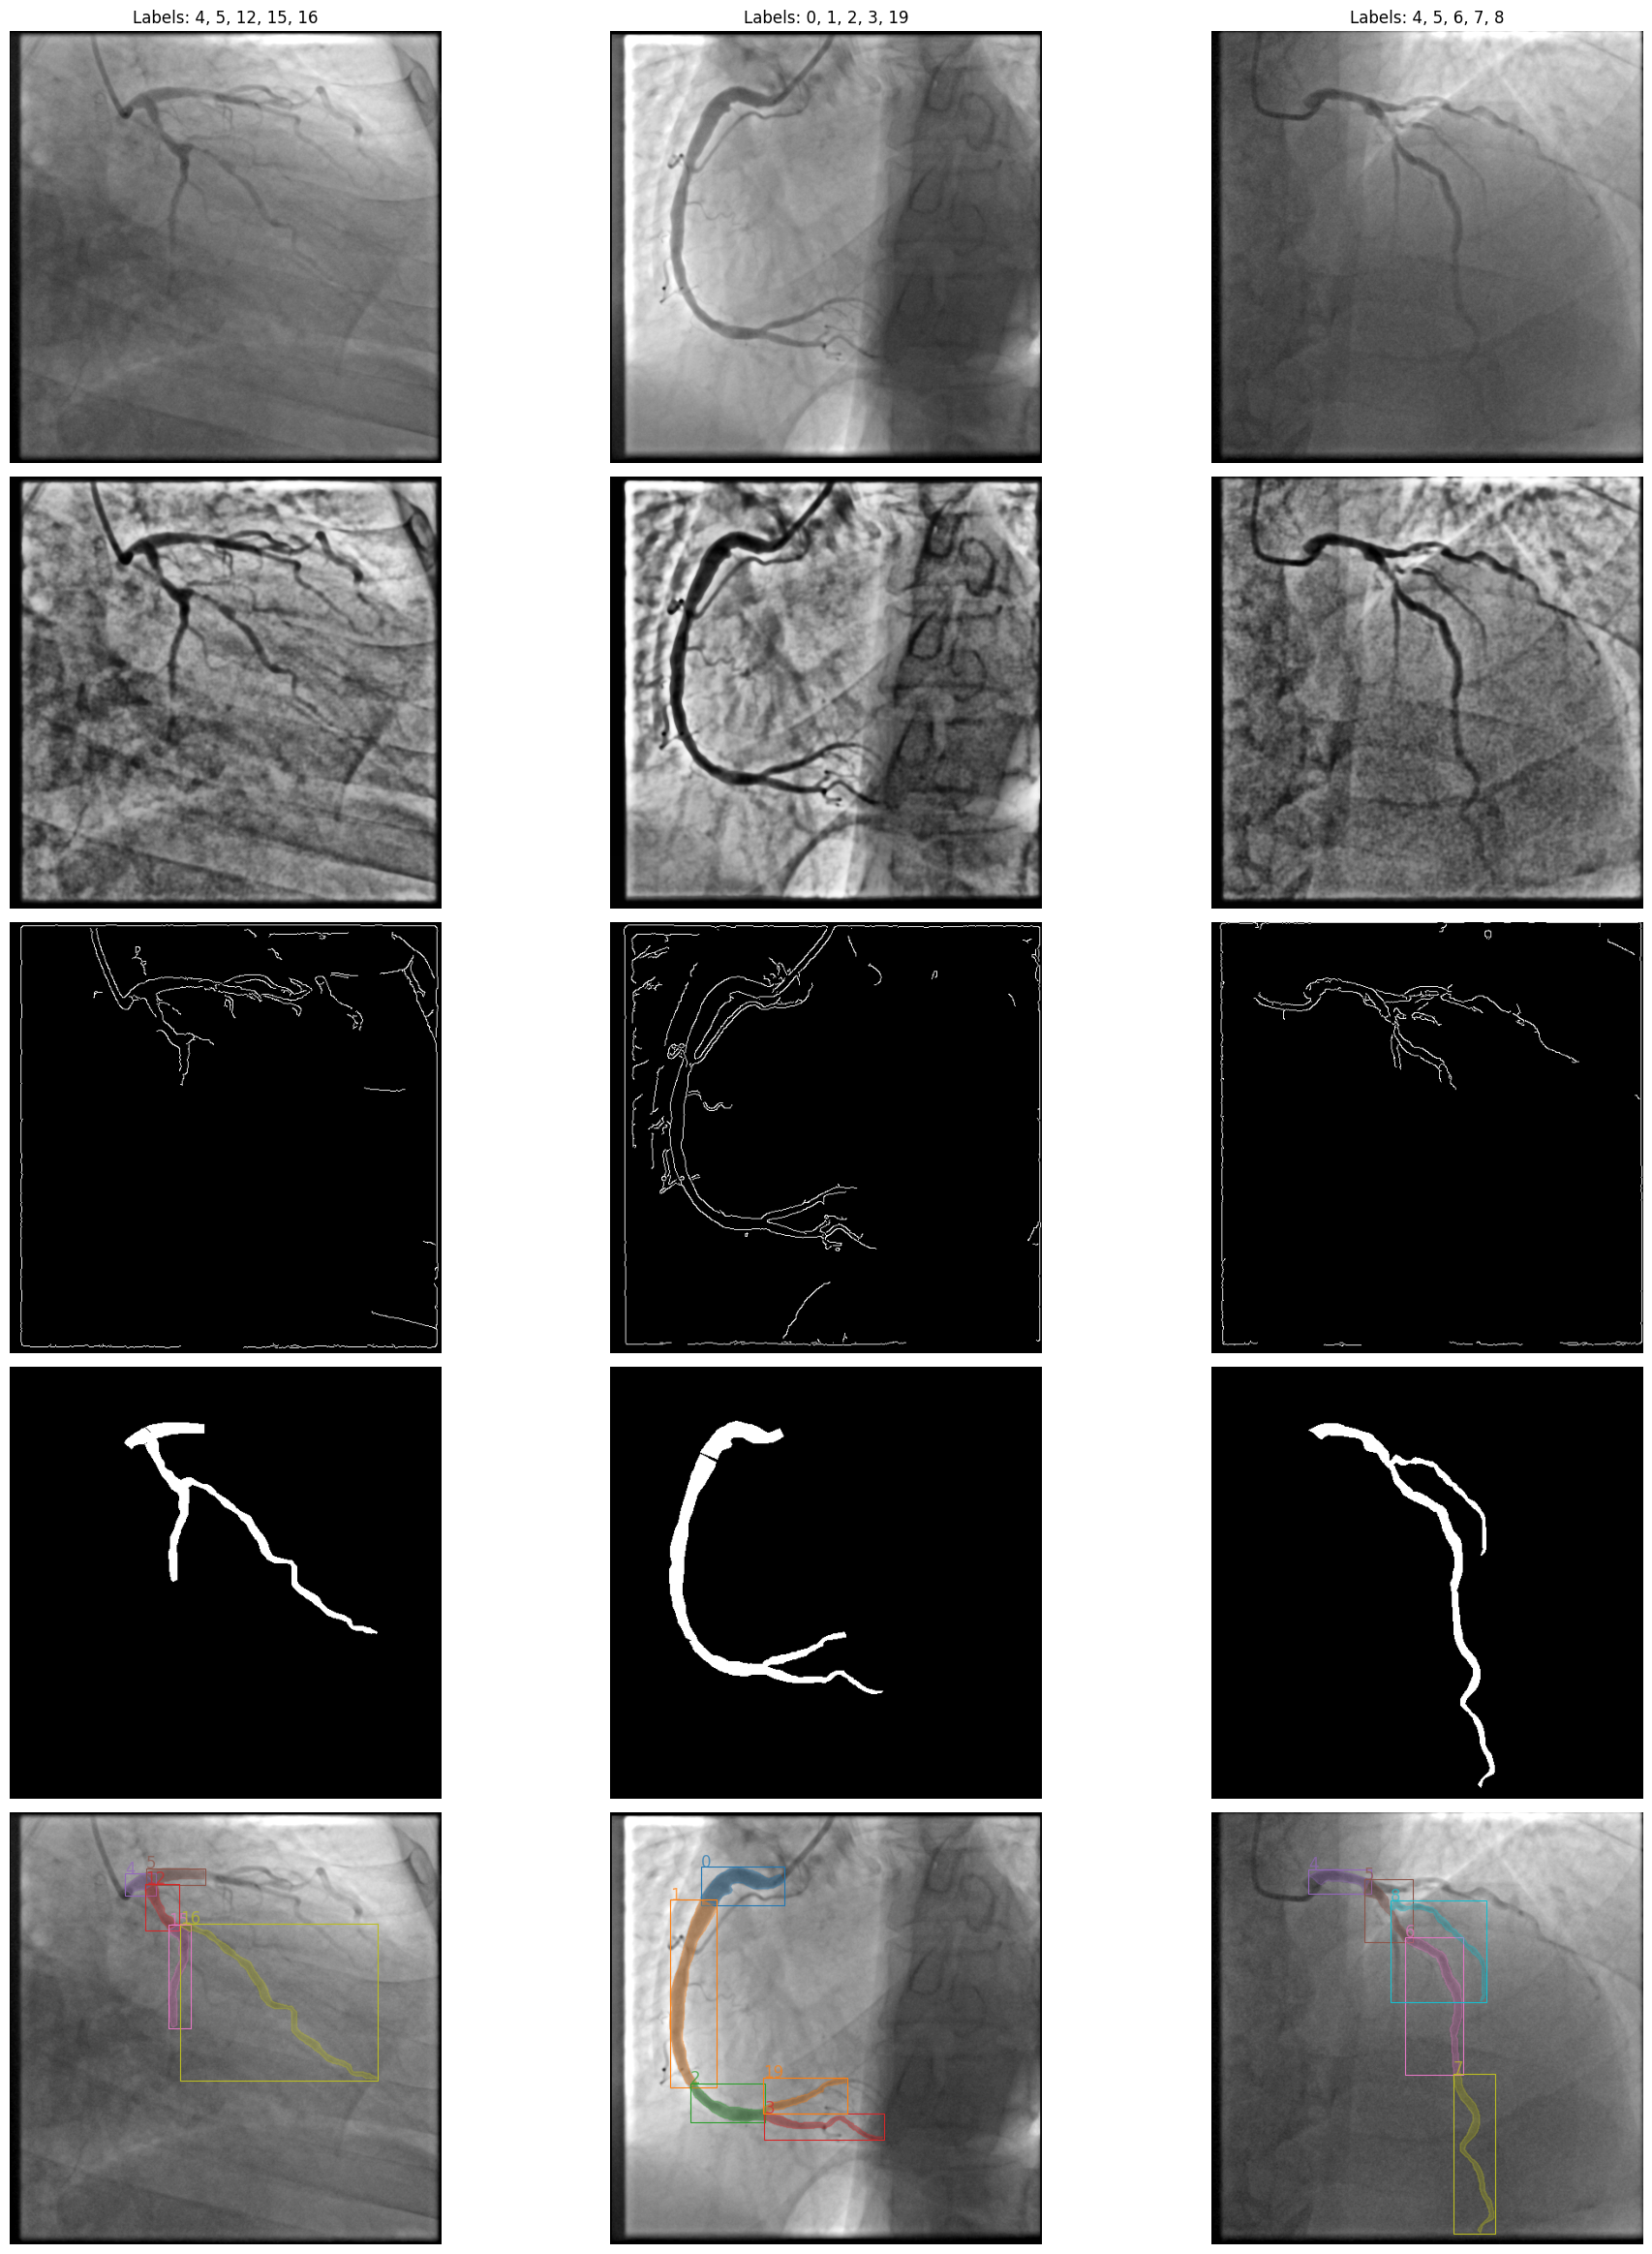

In [14]:
visualize_batch(batch, num_classes=25, num_images=3)

In [15]:
# Look at the output of the model
model.eval()
model.to(device)
x, y_gt = batch['transformed_image'], batch['separate_masks']
decoder_output, vae_output, _, labels, _ = model(x)
img = 0

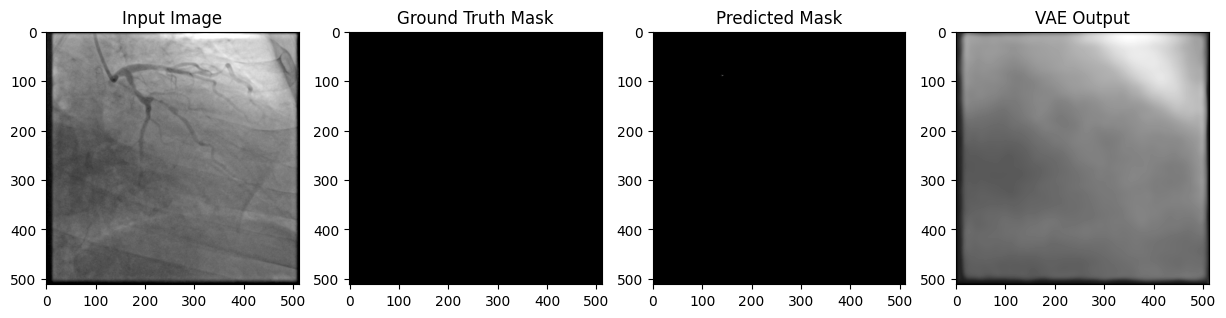

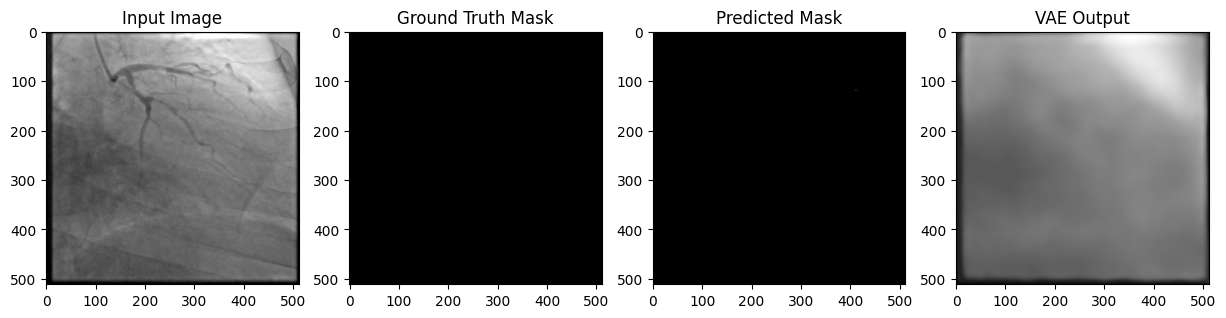

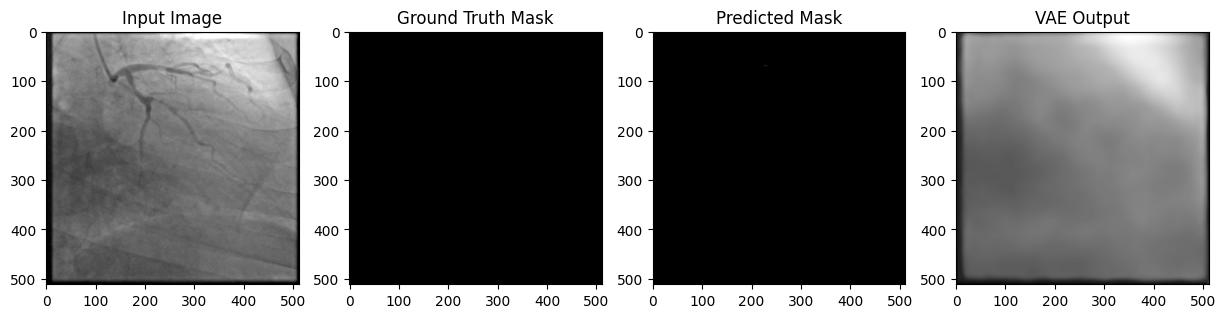

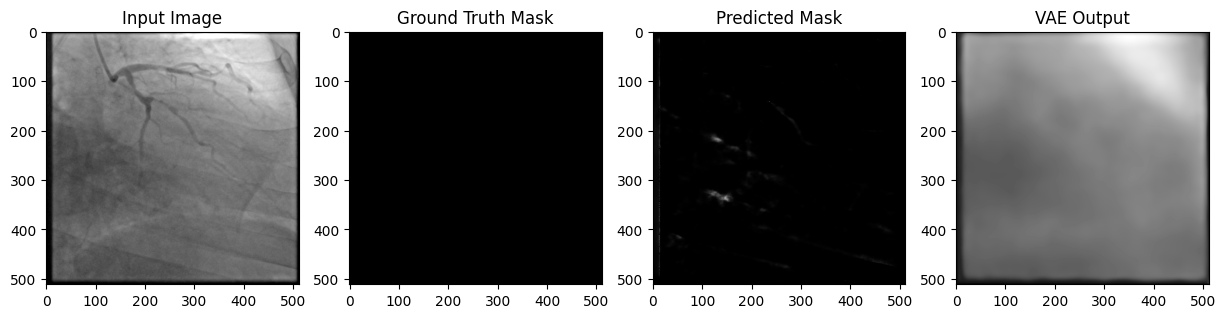

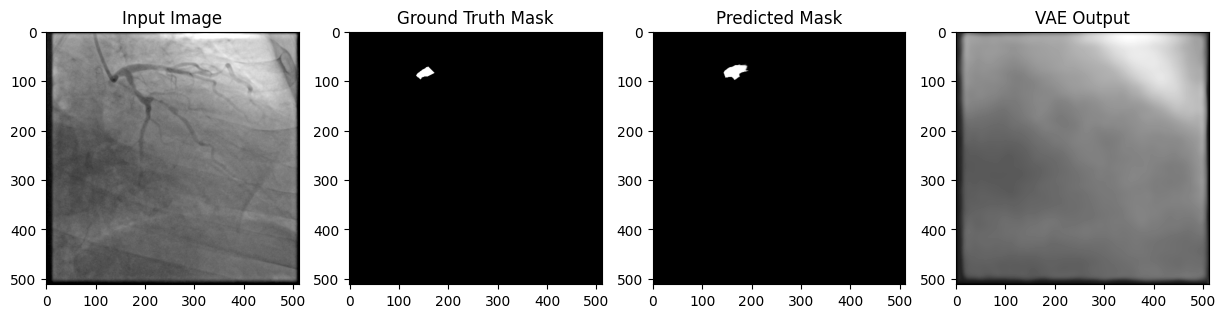

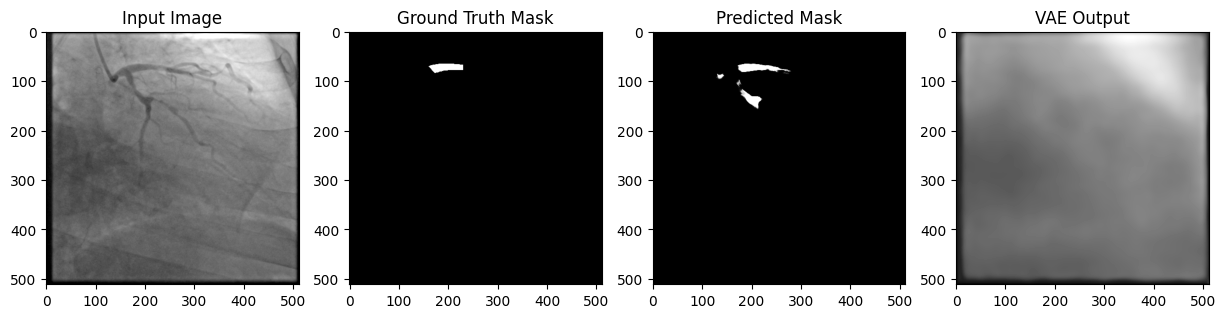

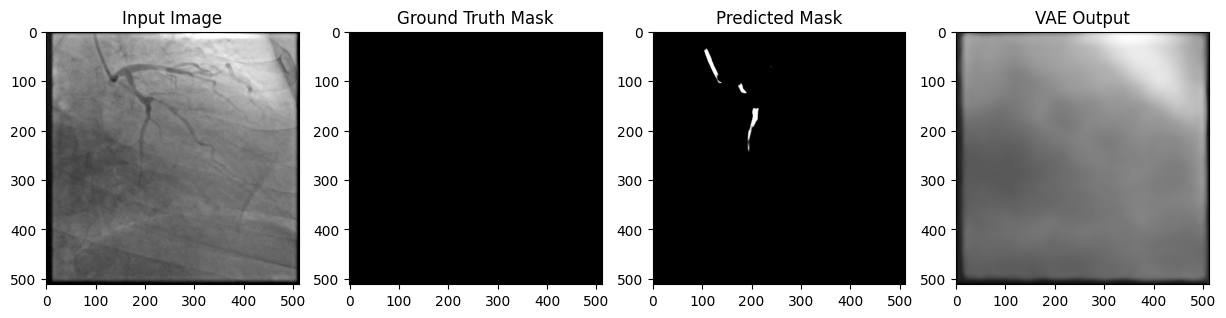

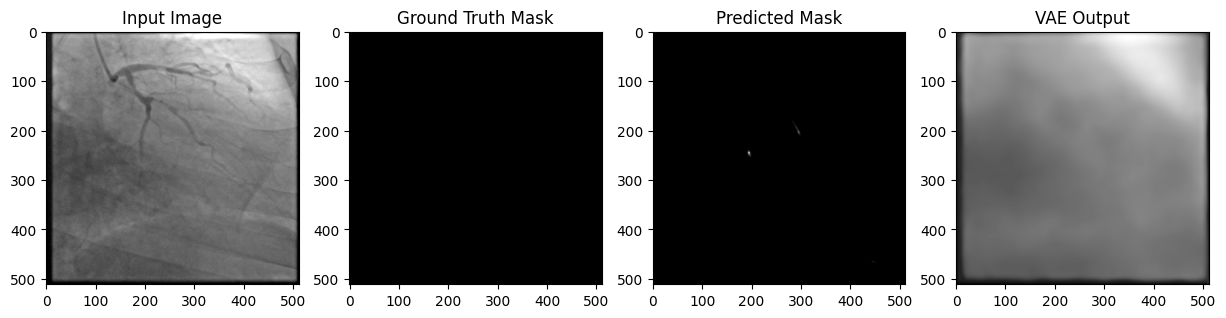

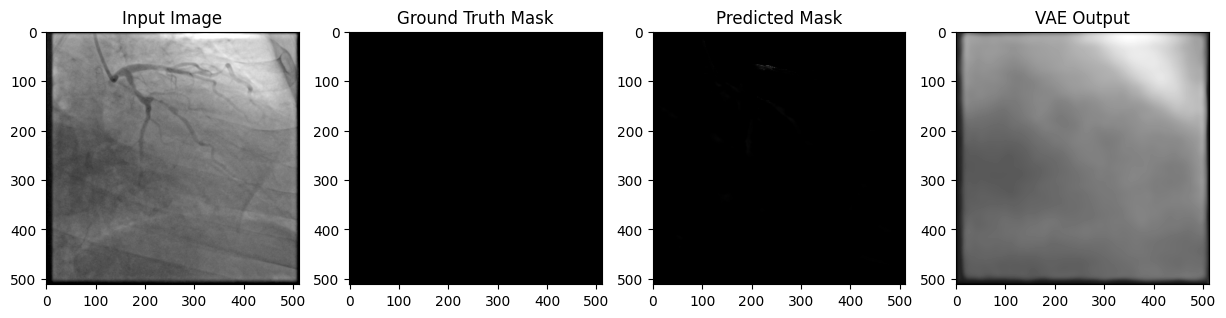

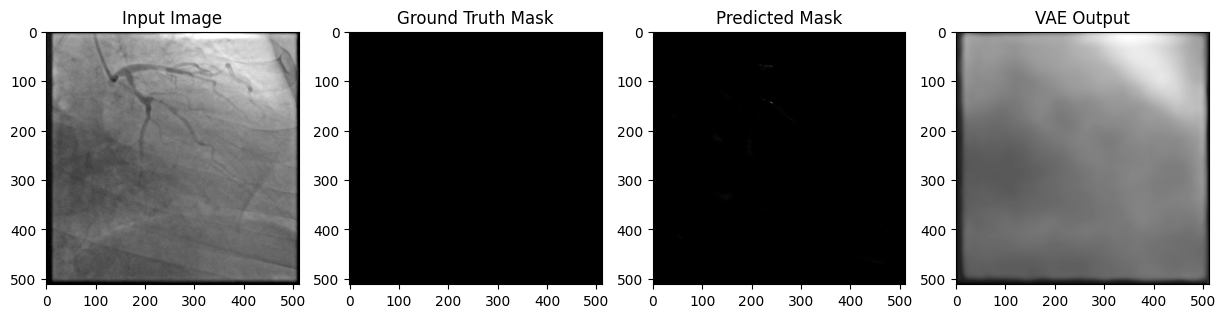

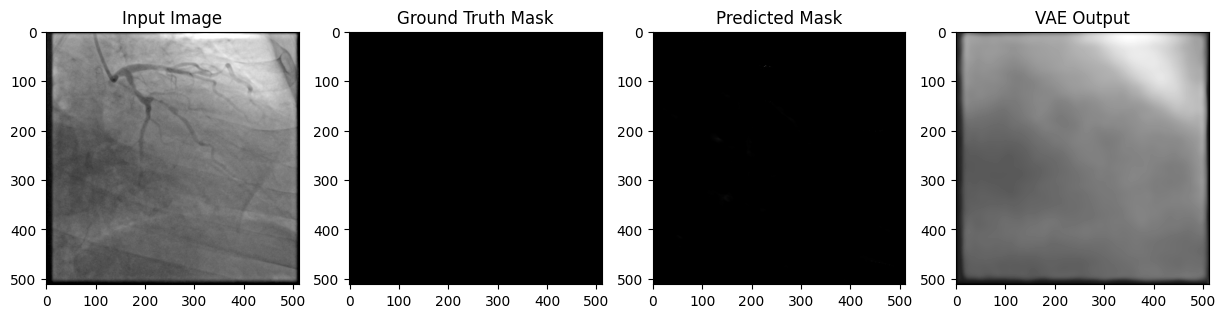

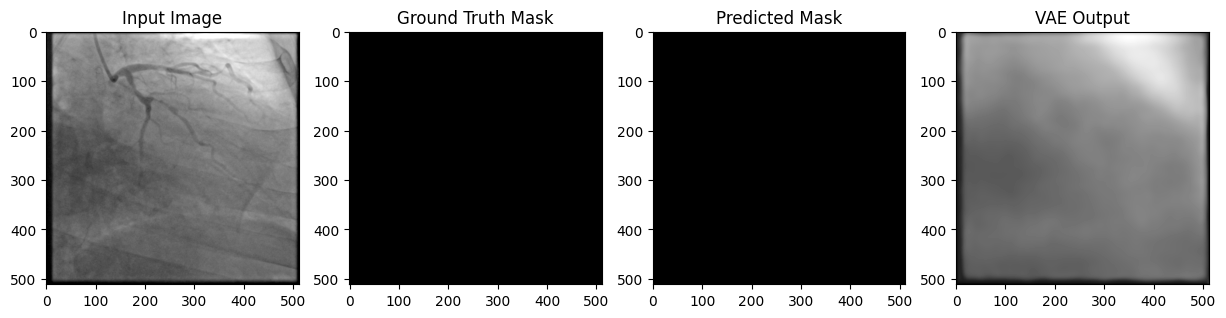

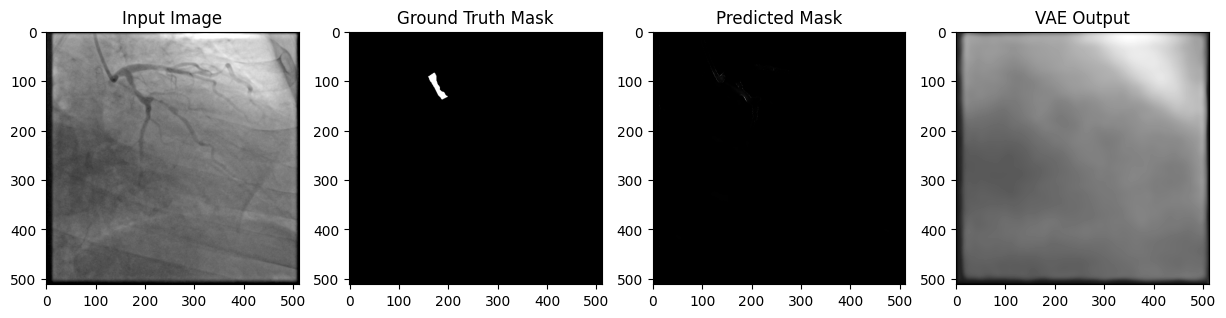

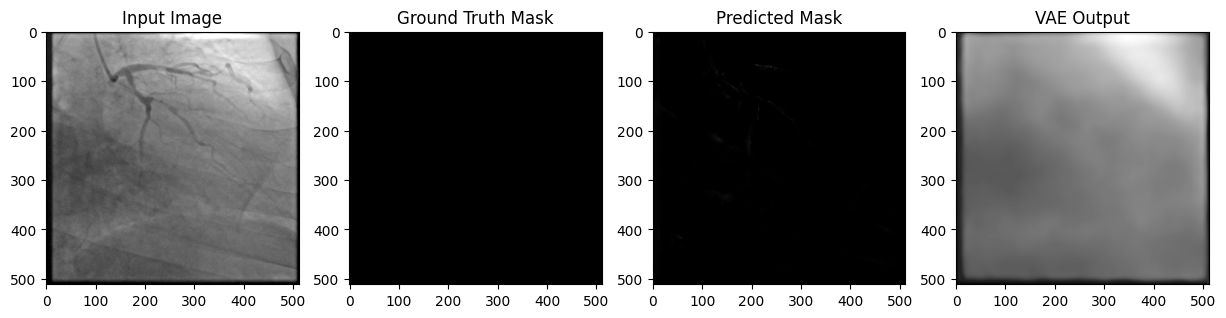

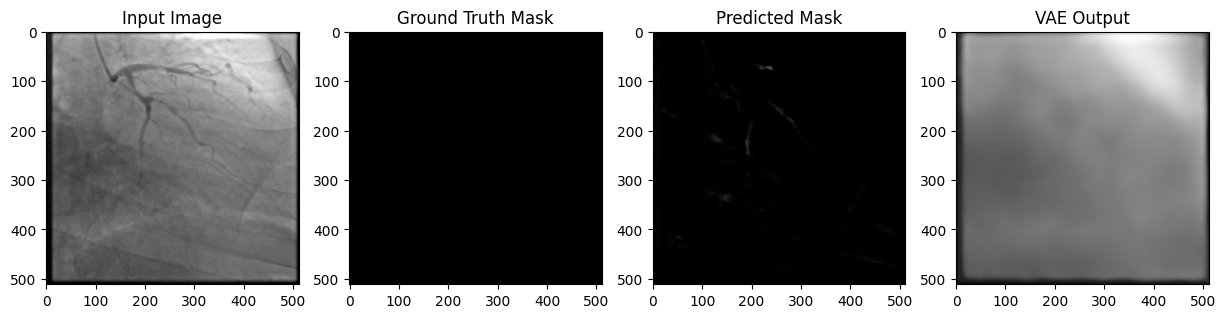

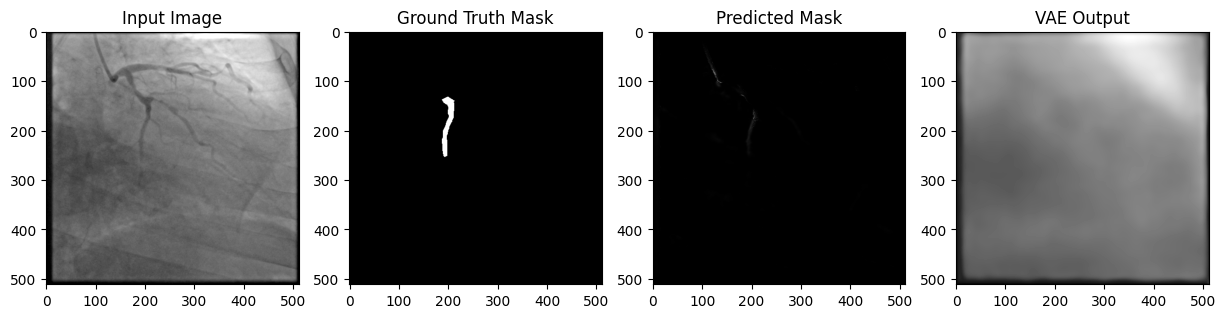

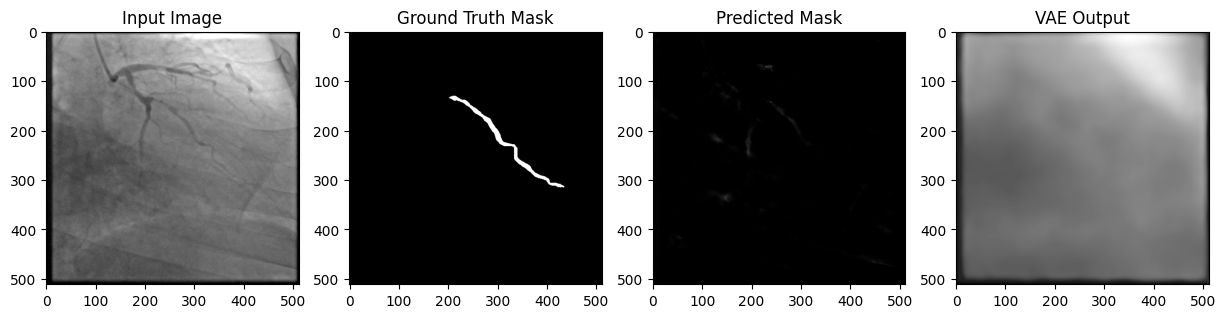

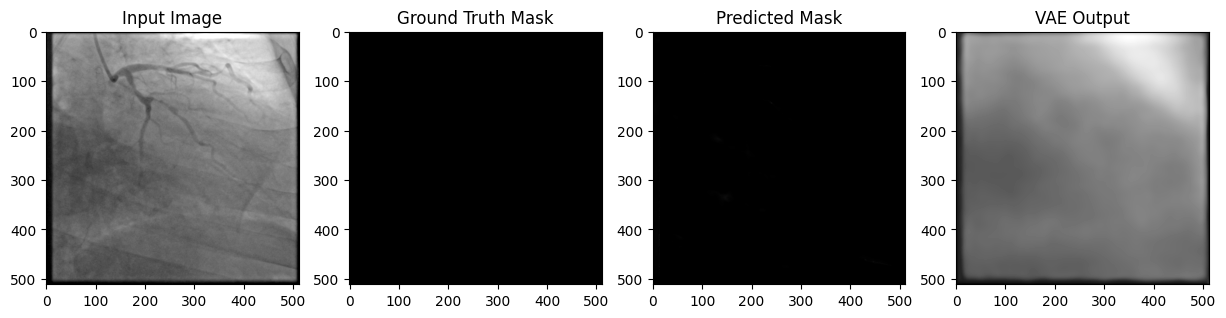

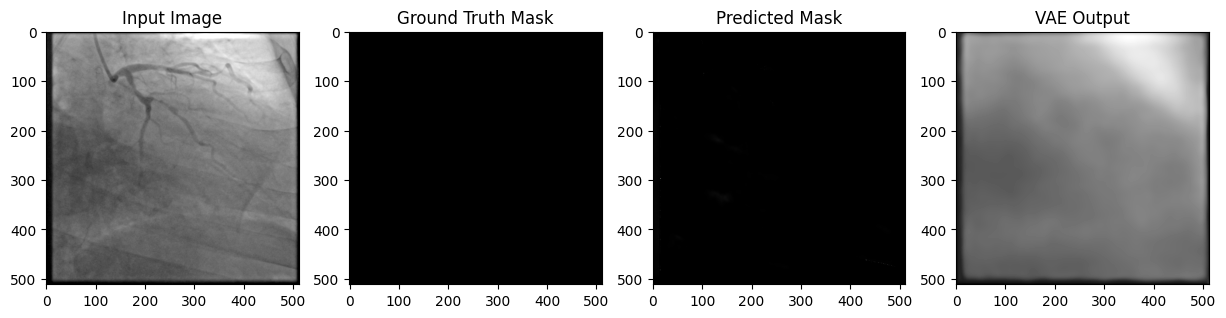

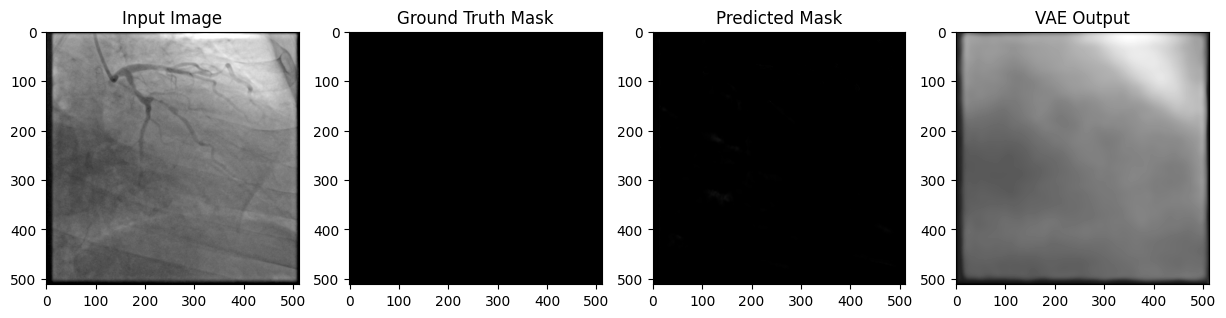

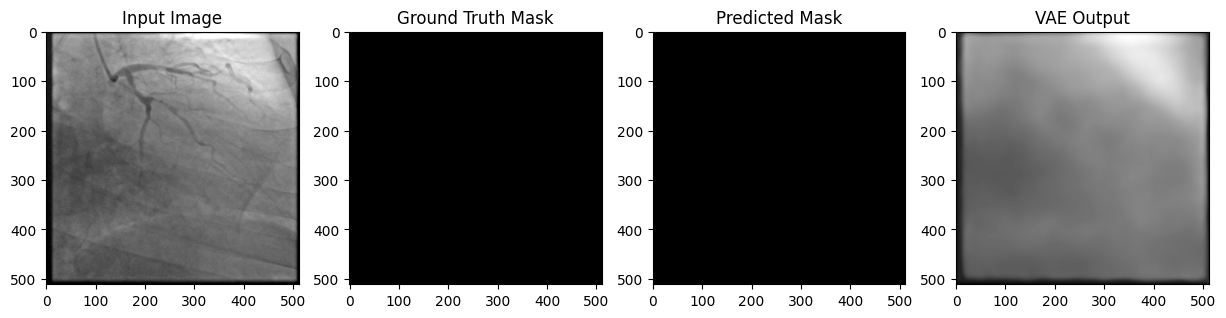

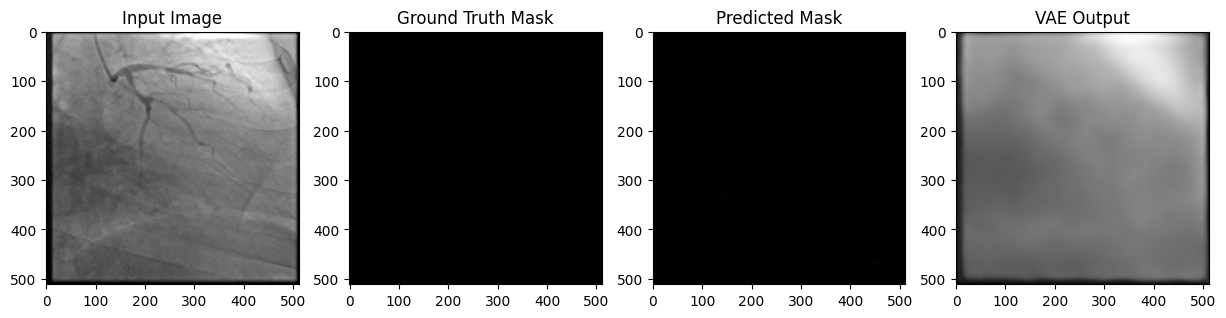

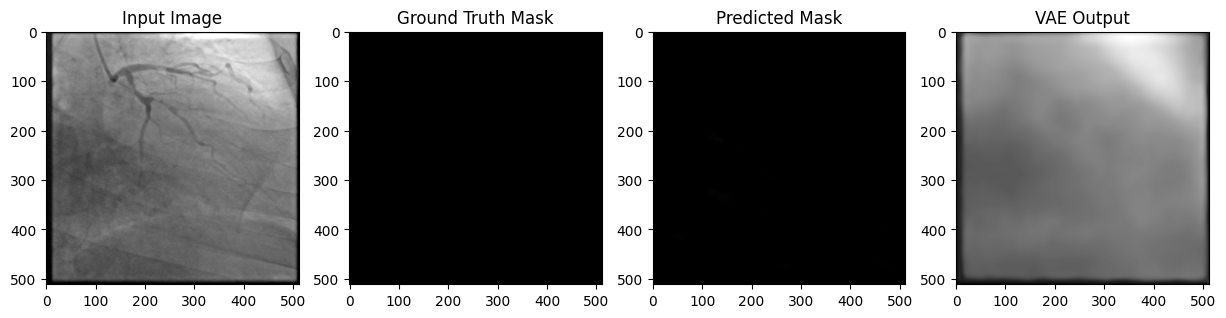

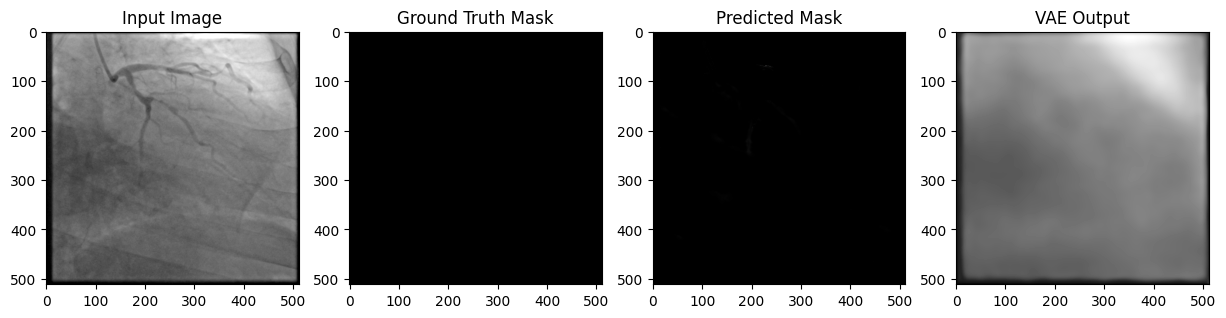

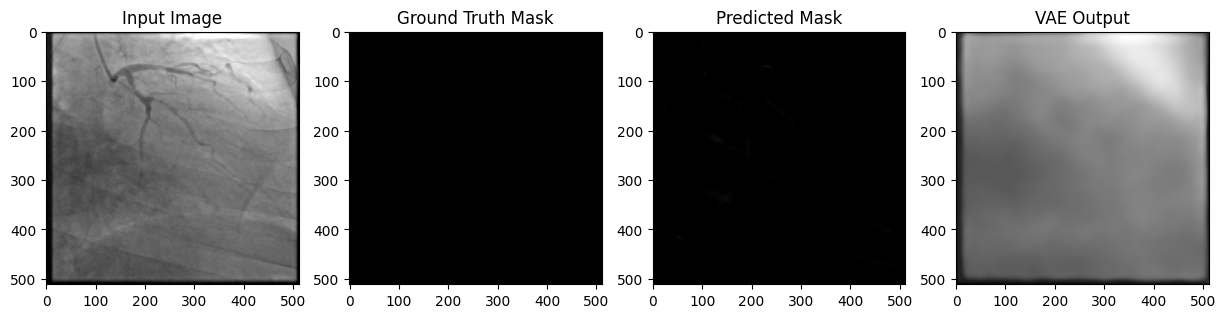

In [16]:

for c in range(25):
    plt.subplots(figsize=(15, 5), ncols=4)
    plt.subplot(1, 4, 1)
    plt.imshow(x[img, 0, :, :].cpu().numpy(), cmap='gray')
    plt.title('Input Image')
    plt.subplot(1, 4, 2)
    plt.imshow(y_gt[img, c, :, :].cpu().numpy(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.subplot(1, 4, 3)
    plt.imshow(decoder_output[img, c, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('Predicted Mask')
    plt.subplot(1, 4, 4)
    plt.imshow(vae_output[img, 0, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('VAE Output')
    plt.show()